# Customizing Plots

In [1]:
url = 'http://bit.ly/2b72LNj'
df = pd.read_csv(url)

In [2]:
df.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360,175,3.15,3.440,17.02,0,0,3,2


## Customizing `matplotllib` graphics

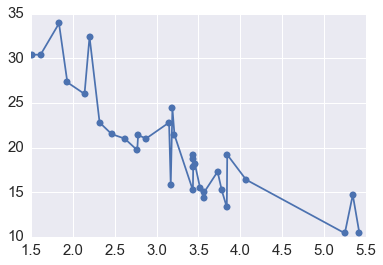

In [3]:
plt.plot('wt', 'mpg', '-o', data = df.sort_values('wt'))
pass

### Adding labels

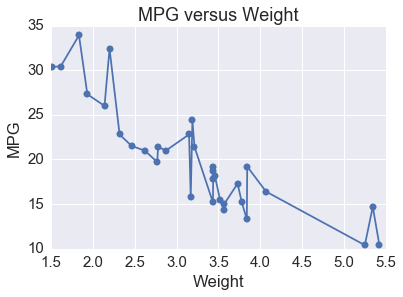

In [4]:
plt.plot('wt', 'mpg', '-o', data = df.sort_values('wt'))
plt.title('MPG versus Weight')
plt.xlabel('Weight')
plt.ylabel('MPG')
pass

### Changing Axes Limits

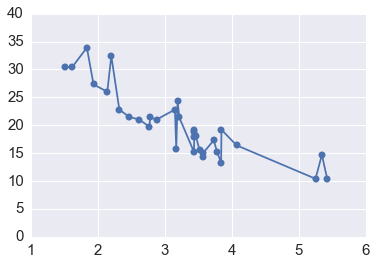

In [5]:
plt.plot('wt', 'mpg', '-o', data = df.sort_values('wt'))
plt.xlim([1, 6])
plt.ylim([0, 40])

pass

### Changing coordinate systems

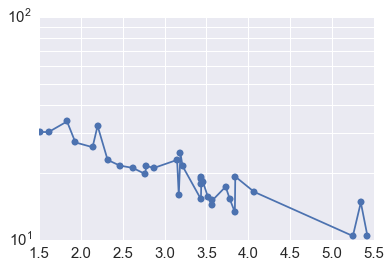

In [6]:
plt.plot('wt', 'mpg', '-o', data = df.sort_values('wt'))
plt.yscale("log")
plt.yticks(np.linspace(10, 100, 10))
pass

### Changing attributes of visual eleemnets

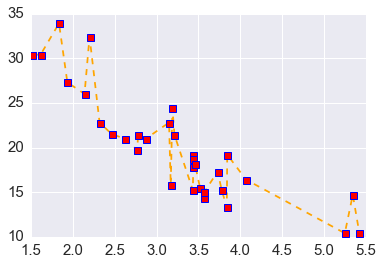

In [7]:
plt.plot('wt', 'mpg', color = 'orange', linestyle = 'dashed',
         marker = 's', mec = 'blue', mew = 1, mfc = 'red',
         data = df.sort_values('wt'))
pass

### Adding annotations

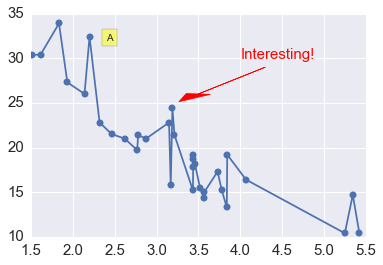

In [8]:
plt.plot('wt', 'mpg', '-o', data = df.sort_values('wt'))
plt.text(4.0, 30.0, 'Interesting!', fontsize = 15, color = 'red')
plt.text(2.4, 32, 'A', bbox = dict(facecolor='yellow', alpha =0.5))
plt.arrow(4.3, 29, -0.80, -3, head_length = 0.9, head_width = 0.3, fc='r', ec='r', lw =0.75)
pass

### Adding legends

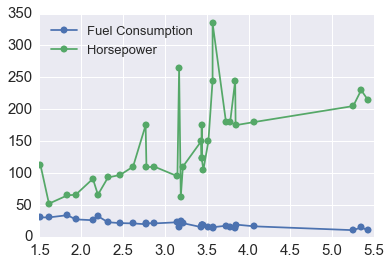

In [9]:
plt.plot('wt', 'mpg', '-o', data = df.sort_values('wt'), label = 'Fuel Consumption')
plt.plot('wt', 'hp', '-o', data = df.sort_values('wt'), label = 'Horsepower')
plt.legend(loc = 'upper left', fontsize = 13)
pass

## Using styles

In [10]:
plt.style.available

['seaborn-dark',
 'seaborn-bright',
 'seaborn-whitegrid',
 'seaborn-paper',
 'seaborn-white',
 'ggplot',
 'fivethirtyeight',
 'seaborn-darkgrid',
 'seaborn-notebook',
 'bmh',
 'seaborn-talk',
 'seaborn-deep',
 'seaborn-pastel',
 'dark_background',
 'grayscale',
 'classic',
 'seaborn-muted',
 'seaborn-dark-palette',
 'seaborn-colorblind',
 'seaborn-poster',
 'seaborn-ticks']

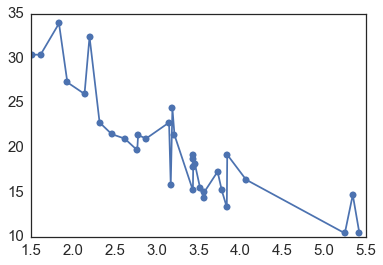

In [11]:
with plt.style.context('seaborn-white'):
    plt.plot('wt', 'mpg', '-o', data = df.sort_values('wt'))

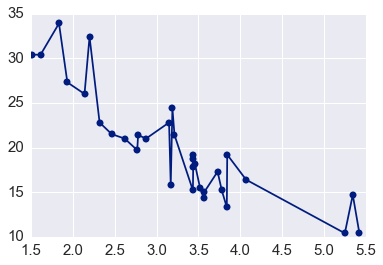

In [12]:
with plt.style.context('seaborn-dark-palette'):
    plt.plot('wt', 'mpg', '-o', data = df.sort_values('wt'))

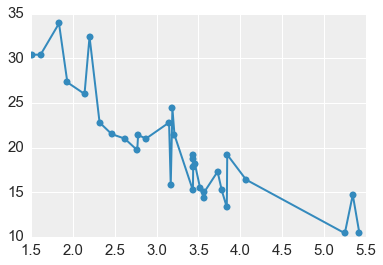

In [13]:
with plt.style.context('bmh'):
    plt.plot('wt', 'mpg', '-o', data = df.sort_values('wt'))

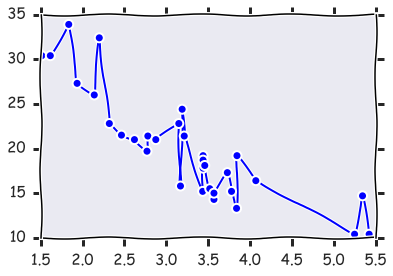

In [14]:
with plt.xkcd():
    plt.plot('wt', 'mpg', '-o', data = df.sort_values('wt'))

## Customizing `seaborn` graphics

Since `seaborn` is built on top of `matplotlib`, customization options for `matplotlib` will also work with `seaborn`. However, `seabornn` plotting functions often give much more scope for customization.

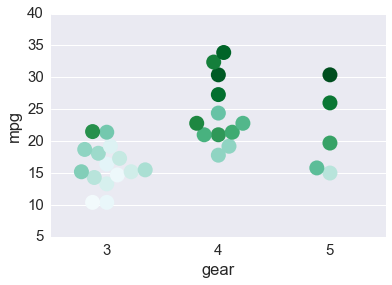

In [15]:
ax = sns.swarmplot('gear', 'mpg', hue = 'wt', 
                   size = 15, palette = "BuGn_r",
                   data = df)
ax.legend_.remove()
pass

## Layout for Multiple Plots

### Data aware grids

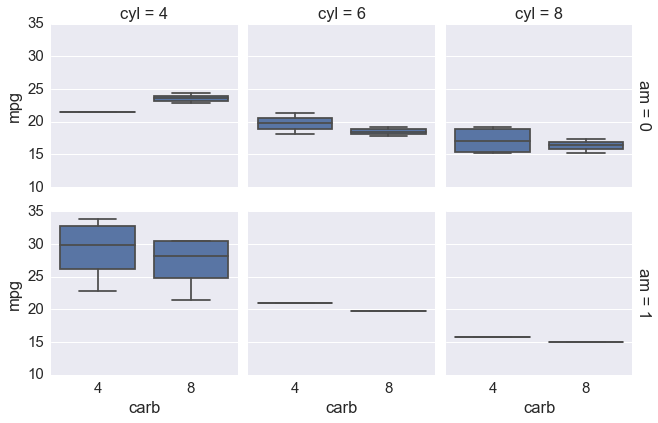

In [16]:
g = sns.FacetGrid(df, row="am", col="cyl", margin_titles=True)
g.map(sns.boxplot, 'carb', 'mpg')
pass

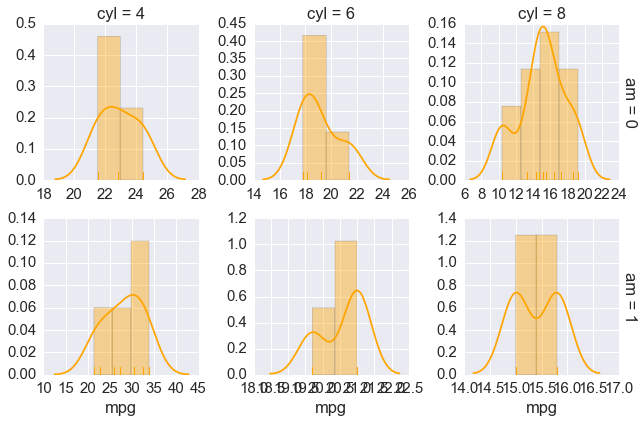

In [17]:
g = sns.FacetGrid(df, row="am", col="cyl", margin_titles=True, 
                  sharex = False, sharey = False)
g.map(sns.distplot, 'mpg', rug = True, color = "orange",)
pass

### Pairwise Plots

In [18]:
df1 = df[['mpg', 'hp', 'drat', 'wt', 'qsec']]

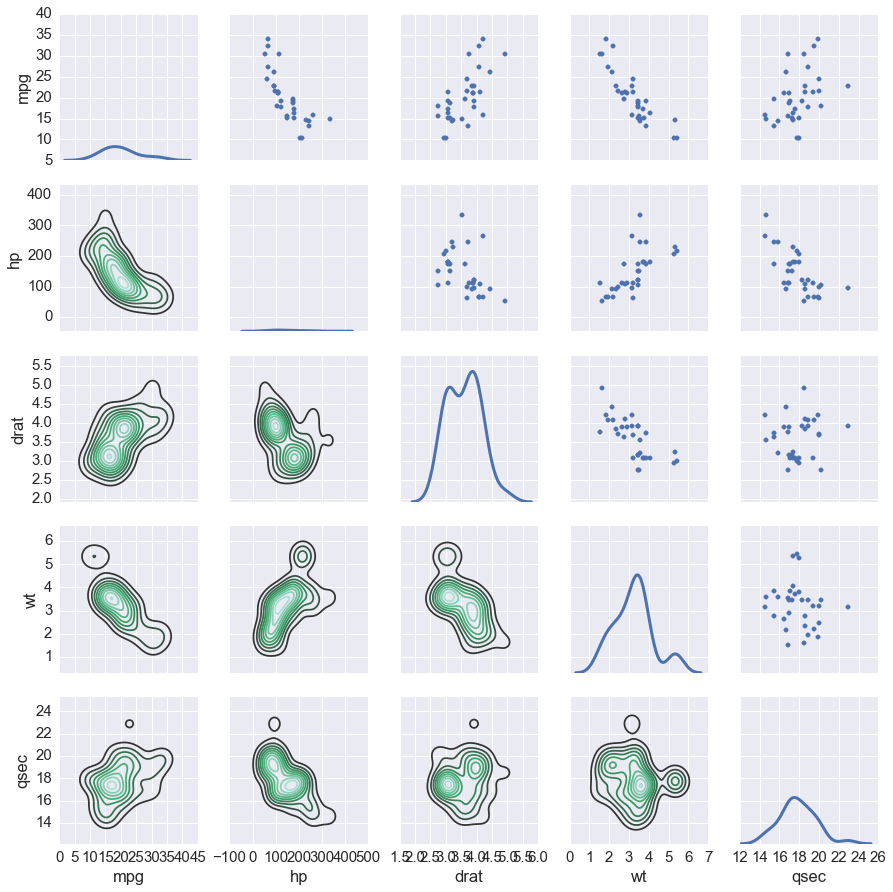

In [19]:
g = sns.PairGrid(df1)
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot)
g.map_diag(sns.kdeplot, lw=3, legend=False)
pass

### Several  `seaborn` plots use these grids under the hood

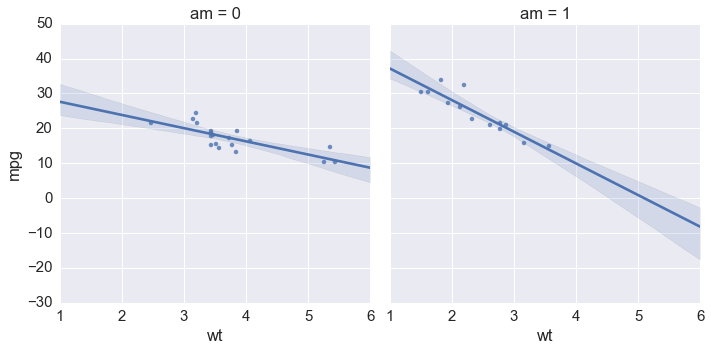

In [20]:
sns.lmplot(x = 'wt', y = 'mpg', col = 'am', data = df)
pass

### Laying Out Multiple Different Types of Plots

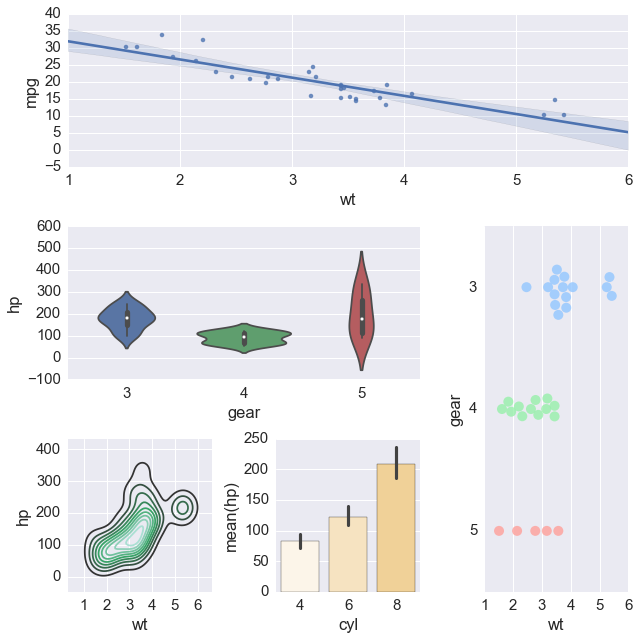

In [21]:
plt.figure(figsize=(9,9))
ax1 = plt.subplot2grid((3,3), (0,0), colspan=3)
ax2 = plt.subplot2grid((3,3), (1,0), colspan=2)
ax3 = plt.subplot2grid((3,3), (1, 2), rowspan=2)
ax4 = plt.subplot2grid((3,3), (2, 0))
ax5 = plt.subplot2grid((3,3), (2, 1))

sns.regplot('wt', 'mpg', data = df, ax = ax1)
sns.violinplot('gear', 'hp', data = df, ax = ax2)
sns.swarmplot('wt', 'gear', data = df, orient = "h",
              size = 10, alpha = 0.8, split = True, palette = 'pastel', ax = ax3)
sns.kdeplot(df.wt, df.hp, ax = ax4)
sns.barplot('cyl', 'hp', data = df, 
            palette = sns.light_palette('orange'),  ax = ax5)
plt.tight_layout()

## Exercises

## Version Information

In [22]:
%load_ext version_information
%version_information

Software versions
Python 3.5.1 64bit [GCC 4.2.1 (Apple Inc. build 5577)]
IPython 4.1.2
OS Darwin 15.6.0 x86_64 i386 64bit
Mon Aug 15 22:45:23 2016 EDT